In [2]:
import os
import pandas as pd
import numpy as np
import math
from scipy import signal
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
from numpy import hstack
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [3]:
def split_sequences(sequences, n_steps):
    inputnn, target = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix + 1 > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix, (1, 4, 7)]
        inputnn.append(seq_x)
        target.append(seq_y)
    return array(inputnn), array(target)

In [4]:
data = pd.read_csv("D:\drive\GitHub\Weather-Forecasting-CBR-fox\Jupyter\weatherdata.csv", parse_dates=True, index_col=1)

In [498]:
step_days = 14
dataset = data.filter(['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
                       'TEMP_AVG', 'TEMP_MAX']).values
dataset = np.array(dataset)
global inputnn, target, input_train, input_test, target_test, target_train
inputnn, target = split_sequences(dataset, step_days)
input_train, input_test, target_train, target_test = train_test_split(inputnn, target, test_size=0.30,
                                                                      random_state=4, shuffle=False)

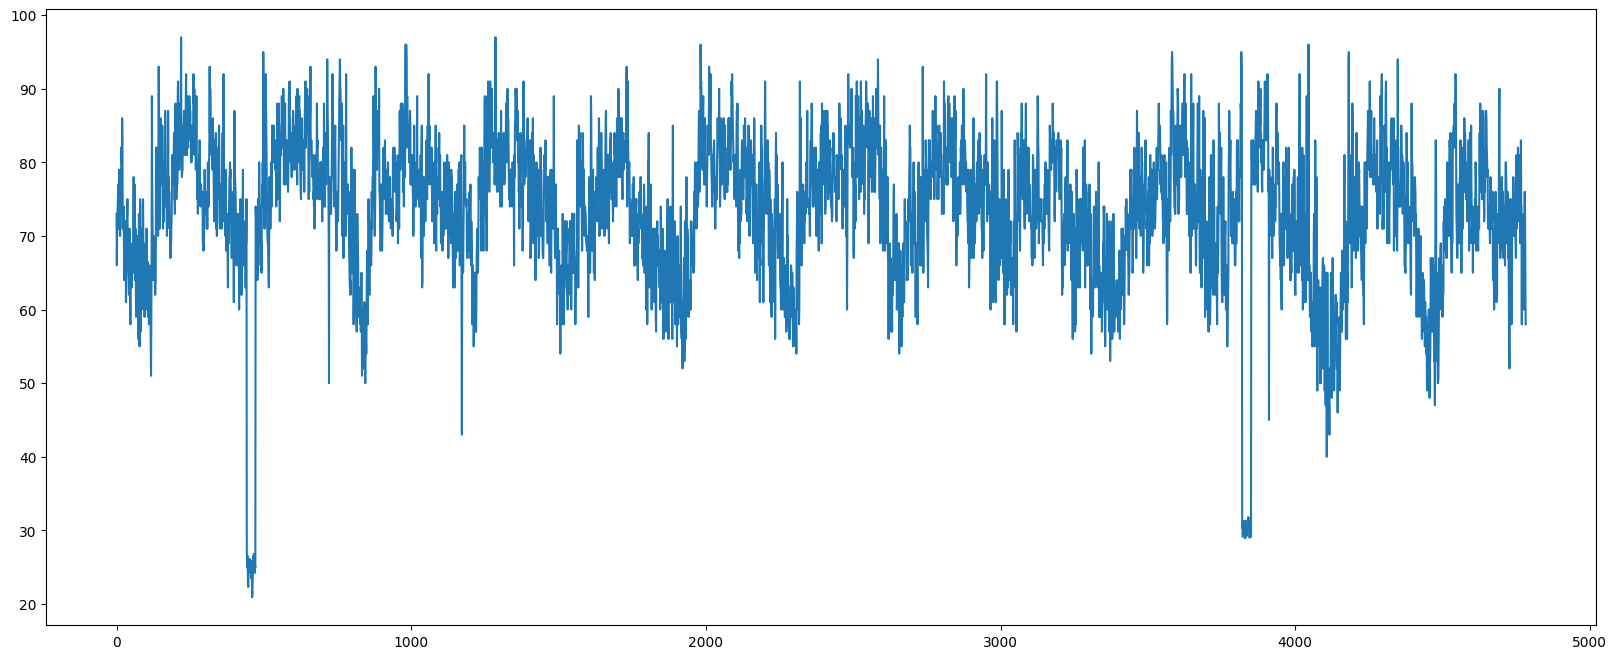

In [499]:
plt.figure(figsize=(20,8))
plt.plot(target_train[:,0])

In [6]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(step_days, input_train.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')
history = model.fit(input_train, target_train, validation_data=(input_test, target_test), batch_size=16, epochs=10)

Epoch 1/10
299/299 [==============================] - 12s 23ms/step - loss: 337.9424 - val_loss: 22.0518
Epoch 2/10
299/299 [==============================] - 6s 22ms/step - loss: 128.4658 - val_loss: 22.6580
Epoch 3/10
299/299 [==============================] - 6s 19ms/step - loss: 109.8329 - val_loss: 19.8249
Epoch 4/10
299/299 [==============================] - 9s 29ms/step - loss: 97.3010 - val_loss: 21.0044
Epoch 5/10
299/299 [==============================] - 9s 32ms/step - loss: 88.9738 - val_loss: 19.9980
Epoch 6/10
299/299 [==============================] - 7s 22ms/step - loss: 85.4446 - val_loss: 22.1701
Epoch 7/10
299/299 [==============================] - 5s 18ms/step - loss: 87.8754 - val_loss: 16.4213
Epoch 8/10
299/299 [==============================] - 5s 18ms/step - loss: 84.3438 - val_loss: 19.3599
Epoch 9/10
299/299 [==============================] - 6s 21ms/step - loss: 84.5645 - val_loss: 20.3870
Epoch 10/10
299/299 [==============================] - 6s 20ms/step -

In [502]:
input_test[0]

array([[37.  , 58.  , 86.  , 15.8 , 17.5 , 20.2 , 17.6 , 24.6 , 31.6 ],
       [44.  , 72.  , 93.  , 18.8 , 22.6 , 25.7 , 19.1 , 26.55, 34.  ],
       [39.  , 72.  , 97.  , 20.6 , 24.8 , 26.8 , 21.3 , 28.25, 35.2 ],
       [36.  , 71.  , 97.  , 20.8 , 24.4 , 26.6 , 21.4 , 29.05, 36.7 ],
       [43.  , 73.  , 97.  , 22.7 , 24.5 , 26.8 , 20.7 , 28.  , 35.3 ],
       [32.  , 68.  , 93.  , 18.1 , 23.7 , 27.3 , 20.5 , 28.  , 35.5 ],
       [37.  , 63.  , 98.  , 20.1 , 23.8 , 30.5 , 19.5 , 27.45, 35.4 ],
       [37.  , 60.  , 97.  , 20.6 , 23.3 , 25.  , 20.9 , 28.3 , 35.7 ],
       [32.  , 65.  , 97.  , 19.  , 23.5 , 27.9 , 21.5 , 29.15, 36.8 ],
       [38.  , 74.  , 96.  , 21.8 , 25.2 , 28.6 , 21.1 , 29.15, 37.2 ],
       [49.  , 76.  , 90.  , 23.5 , 25.3 , 27.9 , 22.2 , 28.1 , 34.  ],
       [49.  , 73.  , 93.  , 20.8 , 23.5 , 25.8 , 21.  , 26.  , 31.  ],
       [49.  , 65.  , 80.  , 13.7 , 17.9 , 21.8 , 19.1 , 22.75, 26.4 ],
       [42.  , 58.  , 73.  , 11.9 , 14.1 , 16.4 , 15.9 , 21.2 , 

In [387]:

windows = input_train
windowsTargets = target_train
studyCase = input_test[0]
windowsLen = len(windows)
componentsLen = windows.shape[2]
windowLen = windows.shape[1]
titleColumns = ["Humidity", "Vapor Pressure", "Temperature"]
titleIndexes = ["Window Index {0}".format(index) for index in range(windowsLen)]
smoothnessFactor = .03
punishedSumFactor = .5
finalWindowNumber = 30
# 0 number of results, 1 average, 2 Max values, 3 min values, 4 median
explicationMethodResult = 2

In [388]:
prediction = model.predict(input_test)

65/65 [==============================] - 1s 13ms/step


In [652]:
windows = input_train
targetWindow = input_test[0]
# NUEVO TARGET WINDOW
# targetWindow = np.delete(input_test, nonOutputColumns, 2)[1]
windowsLen = len(windows)
componentsLen = windows.shape[2]
windowLen = windows.shape[1]
# actualPrediction = prediction[-1]
titleColumns = ["Humidity", "Vapor Pressure" ,"Temperature"]
titleIndexes = ["Window Index {0}".format(index) for index in range(windowsLen)]
smoothnessFactor = .04
punishedSumFactor = .5
finalWindowNumber = 30
#0 number of results, 1 average, 2 Max values, 3 min values, 4 median
explicationMethodResult = 1

In [653]:
prediction_train = model.predict(input_train)
RMSE = math.sqrt(np.square(np.subtract(prediction_train, target_train)).mean())
print("Root Mean Square Error Train:\n", RMSE)
prediction = model.predict(input_test)
RMSE = math.sqrt(np.square(np.subtract(prediction, target_test)).mean())
print("Root Mean Square Error Test:\n", RMSE)

150/150 [==============================] - 2s 11ms/step
Root Mean Square Error Train:
 4.50871847814506
65/65 [==============================] - 1s 11ms/step
Root Mean Square Error Test:
 4.308801125049431


In [654]:
windows[0]

array([[55.  , 80.  , 96.  , 18.5 , 23.1 , 25.3 , 19.2 , 24.55, 29.9 ],
       [53.  , 78.  , 93.  , 23.2 , 24.9 , 27.6 , 21.  , 26.3 , 31.6 ],
       [54.  , 83.  , 99.  , 23.3 , 25.  , 29.3 , 20.  , 25.6 , 31.2 ],
       [55.  , 87.  , 99.  , 22.8 , 24.5 , 27.1 , 18.8 , 24.8 , 30.8 ],
       [72.  , 87.  , 96.  , 19.2 , 21.3 , 23.2 , 18.8 , 21.3 , 23.8 ],
       [59.  , 85.  , 96.  , 20.  , 23.5 , 26.1 , 17.  , 23.2 , 29.4 ],
       [57.  , 84.  , 99.  , 22.8 , 24.9 , 26.8 , 19.4 , 25.  , 30.6 ],
       [59.  , 80.  , 98.  , 22.5 , 23.5 , 26.1 , 19.6 , 24.45, 29.3 ],
       [49.  , 79.  , 98.  , 21.4 , 23.  , 25.9 , 18.6 , 24.9 , 31.2 ],
       [50.  , 81.  , 98.  , 20.4 , 24.2 , 28.1 , 17.8 , 24.85, 31.9 ],
       [44.  , 79.  , 98.  , 20.8 , 24.1 , 26.1 , 19.4 , 25.9 , 32.4 ],
       [45.  , 75.  , 98.  , 18.4 , 22.4 , 25.9 , 18.5 , 24.75, 31.  ],
       [50.  , 78.  , 95.  , 20.4 , 23.5 , 25.4 , 18.6 , 25.25, 31.9 ],
       [49.  , 77.  , 96.  , 19.2 , 22.3 , 25.6 , 20.5 , 25.65, 

In [655]:
pearsonCorrelation = np.array(
    ([np.corrcoef(windows[currentWindow, :, currentComponent], targetWindow[:, currentComponent])[0][1]
      for currentWindow in range(len(windows)) for currentComponent in range(componentsLen)])).reshape(-1,
                                                                                                       componentsLen)
euclideanDistance = np.array(
    ([np.linalg.norm(targetWindow[:, currentComponent] - windows[currentWindow, :, currentComponent])
      for currentWindow in range(windowsLen) for currentComponent in range(componentsLen)])).reshape(-1,
                                                                                                     componentsLen)

D:\programas\Python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\programas\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [656]:
pearsonCorrelation

array([[-0.35064487,  0.18582204,  0.48807608, ..., -0.41062142,
        -0.24870902, -0.18039925],
       [-0.35671654,  0.39347923,  0.72854129, ..., -0.40003854,
        -0.26378953, -0.15701649],
       [-0.11144847,  0.34403815,  0.73548571, ...,  0.25203659,
         0.19656366,  0.13983667],
       ...,
       [-0.06074434, -0.67306224,  0.06065523, ..., -0.38062113,
        -0.0924138 , -0.05512736],
       [ 0.09396871, -0.35501483,  0.3032022 , ..., -0.12113635,
         0.27003633,  0.32929491],
       [ 0.27826232,  0.20798217,  0.70335437, ...,  0.42158364,
         0.80432826,  0.80676226]])

In [657]:
normalizedEuclideanDistance = euclideanDistance / np.amax(euclideanDistance, axis=0)

In [658]:
normalizedEuclideanDistance

array([[0.46815893, 0.33419376, 0.58320365, ..., 0.30497186, 0.4450937 ,
        0.5392483 ],
       [0.46258188, 0.31810108, 0.52385135, ..., 0.30906423, 0.44920536,
        0.53568984],
       [0.43742579, 0.30923199, 0.51608015, ..., 0.27337424, 0.42692586,
        0.51256551],
       ...,
       [0.38705944, 0.26596121, 0.57256312, ..., 0.29242441, 0.40207656,
        0.50373374],
       [0.25859781, 0.21950657, 0.50991573, ..., 0.26648135, 0.31359757,
        0.36330706],
       [0.20553391, 0.16656884, 0.3687551 , ..., 0.19785632, 0.17656069,
        0.20549367]])

In [659]:
normalizedCorrelation = (.5 + (pearsonCorrelation - 2 * normalizedEuclideanDistance + 1) / 4)

In [660]:
normalizedCorrelation

array([[0.42825932, 0.62935863, 0.5804172 , ..., 0.49485871, 0.46527589,
        0.43527604],
       [0.42952992, 0.68931927, 0.67020965, ..., 0.49545825, 0.45944994,
        0.44290096],
       [0.50342499, 0.68139354, 0.67583135, ..., 0.67632203, 0.58567798,
        0.52867641],
       ...,
       [0.54128419, 0.44875383, 0.47888225, ..., 0.50863251, 0.52585827,
        0.48435129],
       [0.64419327, 0.55149301, 0.57084268, ..., 0.58647524, 0.6607103 ,
        0.6506702 ],
       [0.71679863, 0.71871112, 0.74146104, ..., 0.75646775, 0.86280172,
        0.84894373]])

In [661]:
correlationPerWindow = np.sum(((normalizedCorrelation + punishedSumFactor) ** 2), axis=1)

In [662]:
correlationPerWindow

array([10.1414544 , 10.45745713, 11.90078118, ...,  8.73394299,
       10.64454634, 14.31985488])

In [663]:
correlationPerWindow /= max(correlationPerWindow)

In [664]:
correlationPerWindow

array([0.65717786, 0.6776552 , 0.77118425, ..., 0.56596951, 0.68977879,
       0.92794299])

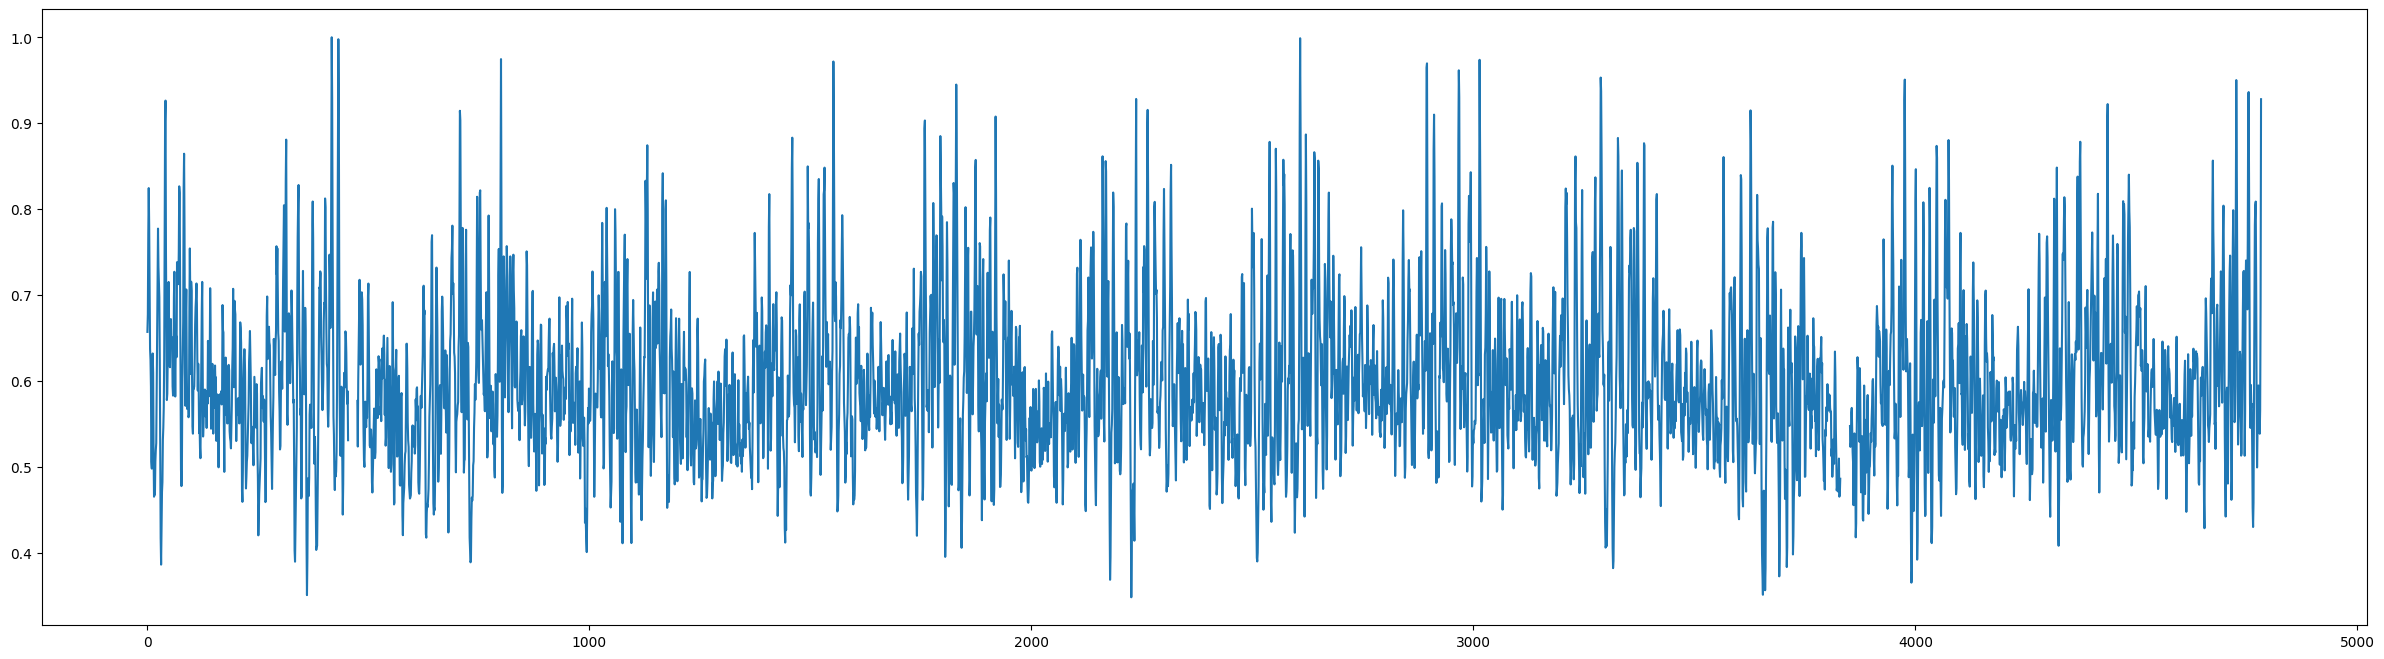

In [665]:
plt.figure(figsize=(30,8))
plt.plot(correlationPerWindow)

In [666]:
smoothedCorrelation = lowess(correlationPerWindow, np.arange(len(correlationPerWindow)), smoothnessFactor)[:, 1]

In [667]:
smoothedCorrelation

array([0.6284219 , 0.62842387, 0.62842419, ..., 0.61693945, 0.61691046,
       0.61687965])

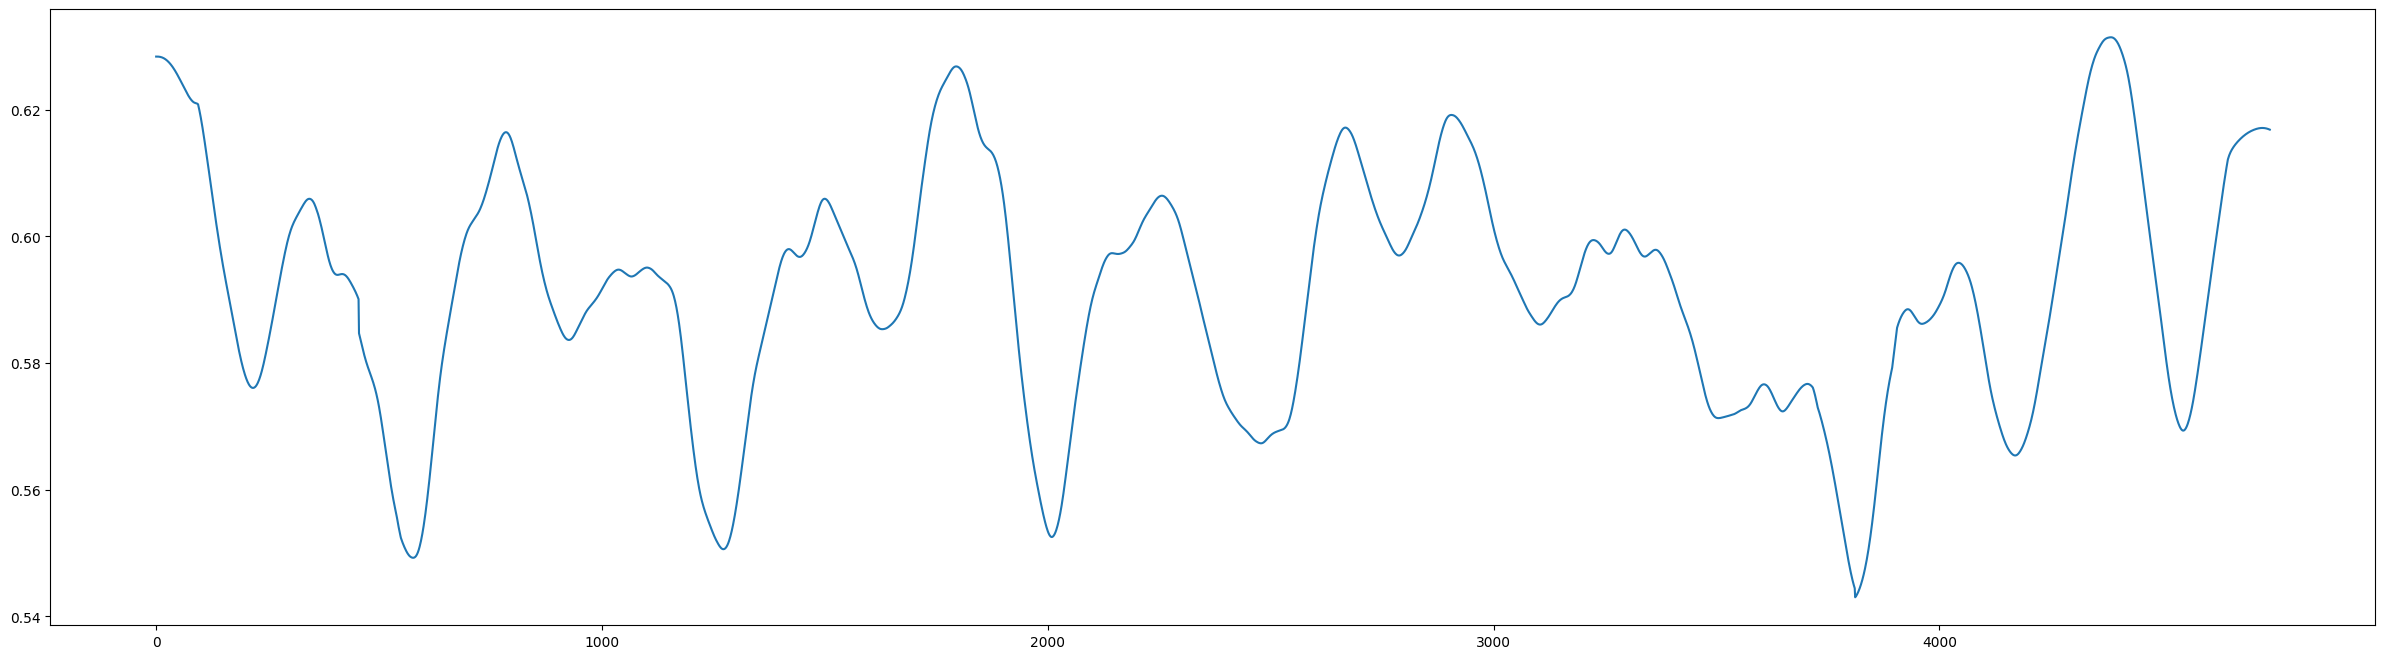

In [668]:
plt.figure(figsize=(30,8))
plt.plot(smoothedCorrelation)

In [669]:
valleyIndex, peakIndex = signal.argrelextrema(smoothedCorrelation, np.less)[0], \
signal.argrelextrema(smoothedCorrelation, np.greater)[0]

In [670]:
valleyIndex

array([ 217,  407,  576,  926, 1066, 1272, 1443, 1629, 2009, 2157, 2478,
       2788, 3104, 3258, 3339, 3504, 3648, 3811, 3961, 4170, 4547],
      dtype=int64)

In [671]:
peakIndex

array([   2,  344,  417,  785, 1037, 1101, 1419, 1499, 1794, 2144, 2256,
       2667, 2905, 3224, 3294, 3363, 3606, 3704, 3929, 4043, 4384, 4724],
      dtype=int64)

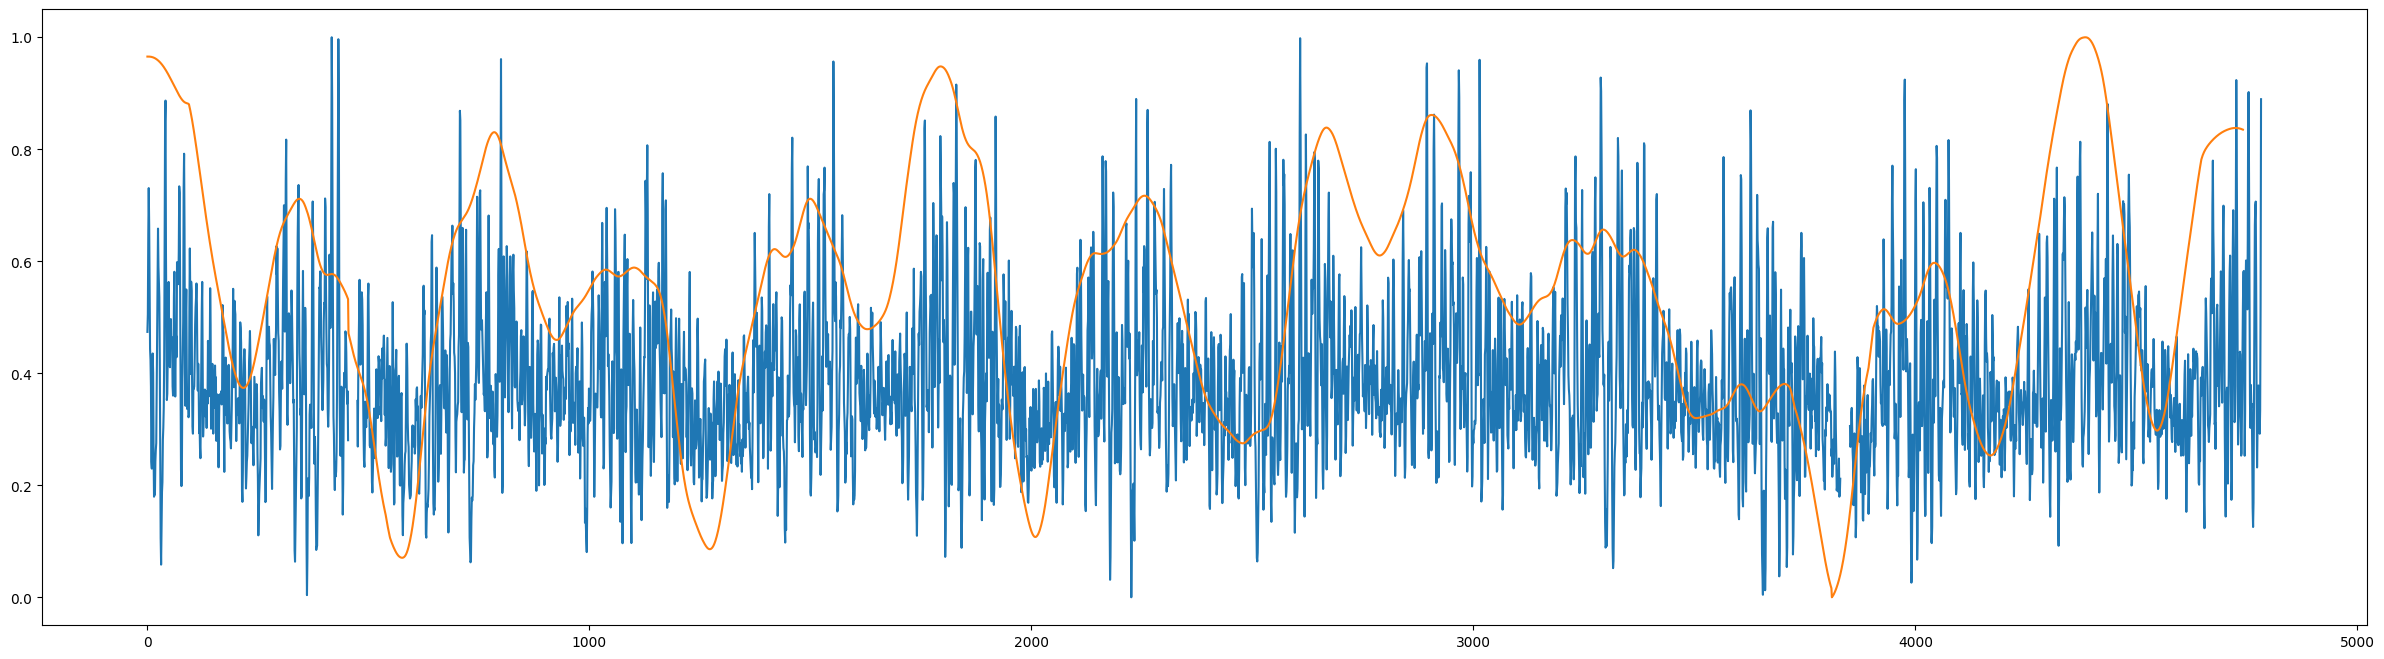

In [672]:
plt.figure(figsize=(30,8))
plt.plot(range(len(correlationPerWindow)), MinMaxScaler().fit_transform(correlationPerWindow.reshape(-1,1)))
plt.plot(range(len(smoothedCorrelation)), MinMaxScaler().fit_transform(smoothedCorrelation.reshape(-1,1)))
# plt.scatter(peakIndex, [smoothedCorrelation2[peak] for peak in peakIndex])
# plt.scatter(valleyIndex, [smoothedCorrelation2[valley] for valley in valleyIndex])

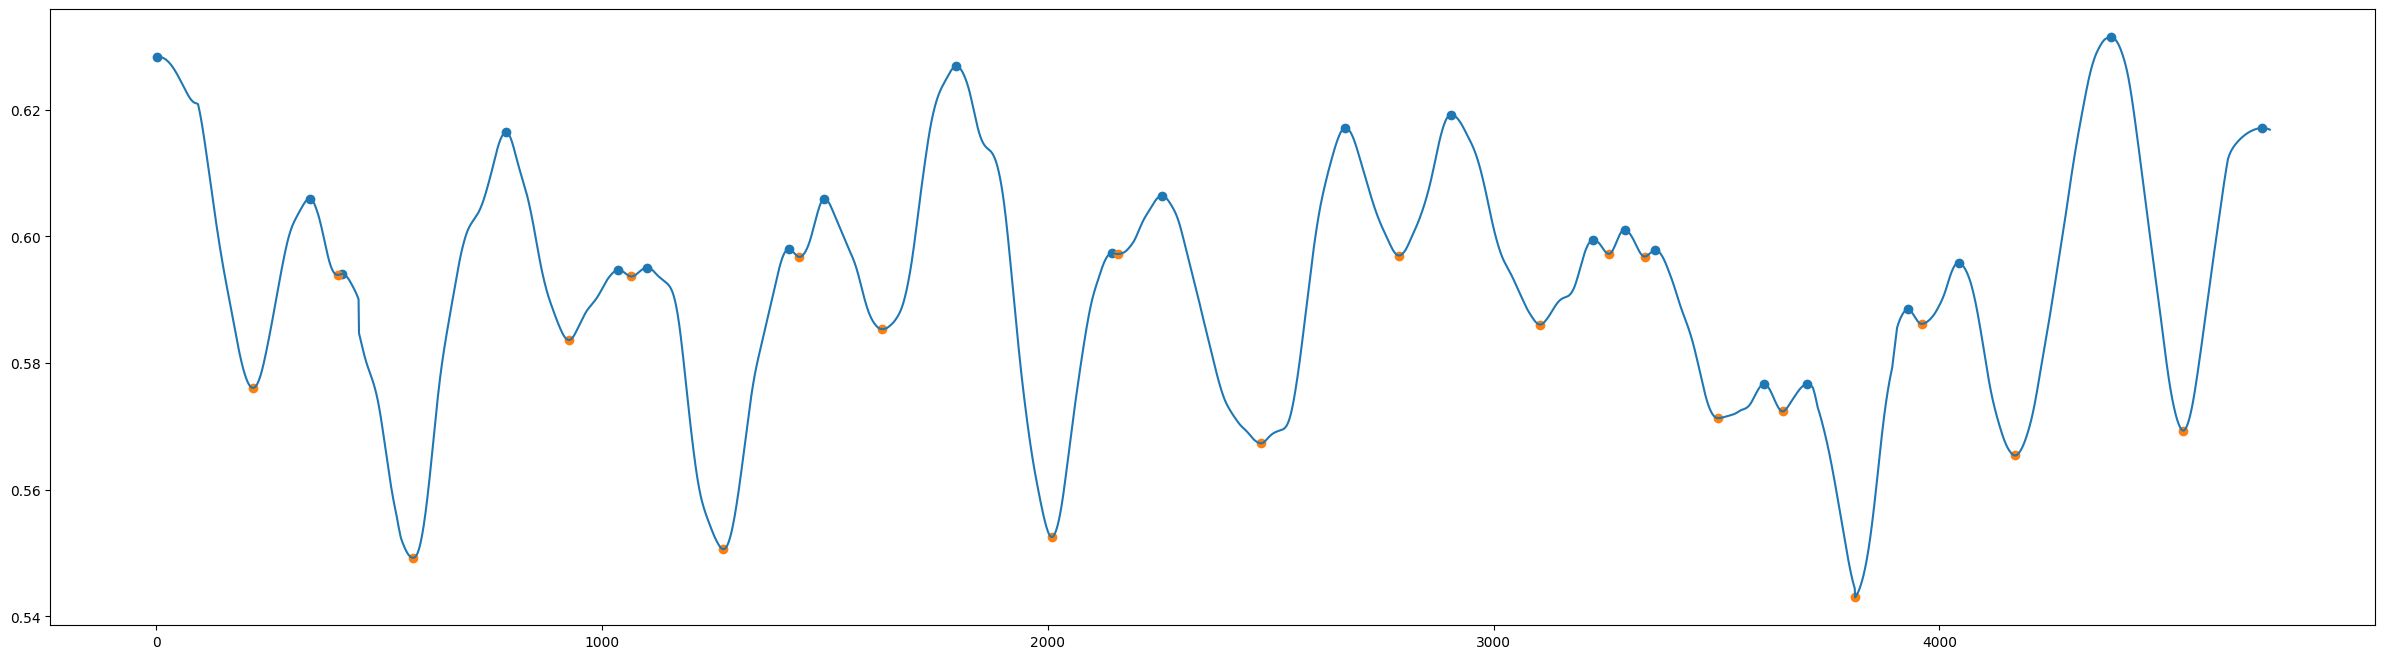

In [673]:
plt.figure(figsize=(30,8))
plt.plot(smoothedCorrelation)
plt.scatter(peakIndex, [smoothedCorrelation[peak] for peak in peakIndex])
plt.scatter(valleyIndex, [smoothedCorrelation[valley] for valley in valleyIndex])

In [674]:
concaveSegments = np.split(np.transpose(np.array((np.arange(windowsLen), correlationPerWindow))), valleyIndex)

In [675]:
concaveSegments

[array([[  0.        ,   0.65717786],
        [  1.        ,   0.6776552 ],
        [  2.        ,   0.77118425],
        [  3.        ,   0.82451719],
        [  4.        ,   0.78153669],
        [  5.        ,   0.71219254],
        [  6.        ,   0.63731675],
        [  7.        ,   0.62481841],
        [  8.        ,   0.59351257],
        [  9.        ,   0.50615149],
        [ 10.        ,   0.49809653],
        [ 11.        ,   0.59222211],
        [ 12.        ,   0.63211633],
        [ 13.        ,   0.60938512],
        [ 14.        ,   0.51349856],
        [ 15.        ,   0.46542902],
        [ 16.        ,   0.46871467],
        [ 17.        ,   0.46784273],
        [ 18.        ,   0.50624935],
        [ 19.        ,   0.51955305],
        [ 20.        ,   0.52782817],
        [ 21.        ,   0.59368944],
        [ 22.        ,   0.66482328],
        [ 23.        ,   0.71333776],
        [ 24.        ,   0.77736373],
        [ 25.        ,   0.73297096],
        [ 26

In [676]:
convexSegments = np.split(np.transpose(np.array((np.arange(windowsLen), correlationPerWindow))), peakIndex)

In [677]:
convexSegments

[array([[0.        , 0.65717786],
        [1.        , 0.6776552 ]]),
 array([[  2.        ,   0.77118425],
        [  3.        ,   0.82451719],
        [  4.        ,   0.78153669],
        [  5.        ,   0.71219254],
        [  6.        ,   0.63731675],
        [  7.        ,   0.62481841],
        [  8.        ,   0.59351257],
        [  9.        ,   0.50615149],
        [ 10.        ,   0.49809653],
        [ 11.        ,   0.59222211],
        [ 12.        ,   0.63211633],
        [ 13.        ,   0.60938512],
        [ 14.        ,   0.51349856],
        [ 15.        ,   0.46542902],
        [ 16.        ,   0.46871467],
        [ 17.        ,   0.46784273],
        [ 18.        ,   0.50624935],
        [ 19.        ,   0.51955305],
        [ 20.        ,   0.52782817],
        [ 21.        ,   0.59368944],
        [ 22.        ,   0.66482328],
        [ 23.        ,   0.71333776],
        [ 24.        ,   0.77736373],
        [ 25.        ,   0.73297096],
        [ 26.     

In [678]:
bestWindowsIndex, worstWindowsIndex = list(), list()

for split in concaveSegments:
    bestWindowsIndex.append(int(split[np.where(split == max(split[:, 1]))[0][0], 0]))

In [679]:
bestWindowsIndex

[41,
 314,
 417,
 800,
 1039,
 1131,
 1407,
 1552,
 1830,
 2140,
 2237,
 2608,
 3014,
 3231,
 3288,
 3386,
 3627,
 3678,
 3948,
 3976,
 4435,
 4726]

In [680]:
for split in convexSegments:
    worstWindowsIndex.append(int(split[np.where(split == min(split[:, 1]))[0][0], 0]))

In [681]:
worstWindowsIndex

[0,
 31,
 361,
 731,
 994,
 1075,
 1118,
 1443,
 1741,
 1805,
 2226,
 2511,
 2845,
 3066,
 3253,
 3316,
 3601,
 3655,
 3709,
 3991,
 4324,
 4654,
 4764]

In [682]:
bestDic = {index: correlationPerWindow[index] for index in bestWindowsIndex}

In [683]:
bestDic

{41: 0.9263310360827103,
 314: 0.8809180813484319,
 417: 1.0,
 800: 0.974589425129178,
 1039: 0.8015352817744857,
 1131: 0.8743302733016083,
 1407: 0.8175139921608143,
 1552: 0.9718026439158217,
 1830: 0.944952087228438,
 2140: 0.7736394333671593,
 2237: 0.9282263767986986,
 2608: 0.9988707165540528,
 3014: 0.9737841095083022,
 3231: 0.8613641759264351,
 3288: 0.9531148198709213,
 3386: 0.8767046972529743,
 3627: 0.9149184379929787,
 3678: 0.785358833283294,
 3948: 0.8506073675070861,
 3976: 0.9507407825678776,
 4435: 0.9222453456500839,
 4726: 0.9501998486610672}

In [684]:
worstDic = {index: correlationPerWindow[index] for index in worstWindowsIndex}

In [685]:
worstDic

{0: 0.6571778564682383,
 31: 0.38638645751455053,
 361: 0.35092837071423455,
 731: 0.38908403971479544,
 994: 0.4009861570122449,
 1075: 0.41126533136827564,
 1118: 0.43814742824931163,
 1443: 0.4120601491818107,
 1741: 0.4199704375436403,
 1805: 0.39540503260300586,
 2226: 0.34839396016769547,
 2511: 0.3900851953956567,
 2845: 0.48744110693400416,
 3066: 0.4503713424688967,
 3253: 0.4688999504077955,
 3316: 0.38229809981189006,
 3601: 0.4392121679774798,
 3655: 0.35131897405935425,
 3709: 0.3835772146072385,
 3991: 0.3654090454688607,
 4324: 0.4083351806343531,
 4654: 0.42875318015953423,
 4764: 0.43014680119566717}

In [686]:
bestSorted = sorted(bestDic.items(), reverse=True, key=lambda x: x[1])

In [687]:
bestSorted

[(417, 1.0),
 (2608, 0.9988707165540528),
 (800, 0.974589425129178),
 (3014, 0.9737841095083022),
 (1552, 0.9718026439158217),
 (3288, 0.9531148198709213),
 (3976, 0.9507407825678776),
 (4726, 0.9501998486610672),
 (1830, 0.944952087228438),
 (2237, 0.9282263767986986),
 (41, 0.9263310360827103),
 (4435, 0.9222453456500839),
 (3627, 0.9149184379929787),
 (314, 0.8809180813484319),
 (3386, 0.8767046972529743),
 (1131, 0.8743302733016083),
 (3231, 0.8613641759264351),
 (3948, 0.8506073675070861),
 (1407, 0.8175139921608143),
 (1039, 0.8015352817744857),
 (3678, 0.785358833283294),
 (2140, 0.7736394333671593)]

In [688]:
worstSorted = sorted(worstDic.items(), key=lambda x: x[1])

In [689]:
worstSorted

[(2226, 0.34839396016769547),
 (361, 0.35092837071423455),
 (3655, 0.35131897405935425),
 (3991, 0.3654090454688607),
 (3316, 0.38229809981189006),
 (3709, 0.3835772146072385),
 (31, 0.38638645751455053),
 (731, 0.38908403971479544),
 (2511, 0.3900851953956567),
 (1805, 0.39540503260300586),
 (994, 0.4009861570122449),
 (4324, 0.4083351806343531),
 (1075, 0.41126533136827564),
 (1443, 0.4120601491818107),
 (1741, 0.4199704375436403),
 (4654, 0.42875318015953423),
 (4764, 0.43014680119566717),
 (1118, 0.43814742824931163),
 (3601, 0.4392121679774798),
 (3066, 0.4503713424688967),
 (3253, 0.4688999504077955),
 (2845, 0.48744110693400416),
 (0, 0.6571778564682383)]

In [690]:
bestSorted = bestSorted[0:4]
worstSorted = worstSorted[0:4]

In [691]:
bestSorted

[(417, 1.0),
 (2608, 0.9988707165540528),
 (800, 0.974589425129178),
 (3014, 0.9737841095083022)]

In [692]:
worstSorted

[(2226, 0.34839396016769547),
 (361, 0.35092837071423455),
 (3655, 0.35131897405935425),
 (3991, 0.3654090454688607)]

In [693]:
bestSorted

[(417, 1.0),
 (2608, 0.9988707165540528),
 (800, 0.974589425129178),
 (3014, 0.9737841095083022)]

In [694]:
windows.shape

(4783, 14, 9)

In [695]:
target_train

array([[73.  , 19.8 , 24.15],
       [66.  , 16.7 , 22.45],
       [70.  , 17.1 , 21.05],
       ...,
       [73.  , 23.5 , 26.  ],
       [65.  , 17.9 , 22.75],
       [58.  , 14.1 , 21.2 ]])

In [701]:
target_train[417]

array([70. , 17.3, 20.6])

IndexError: index 3 is out of bounds for axis 1 with size 3

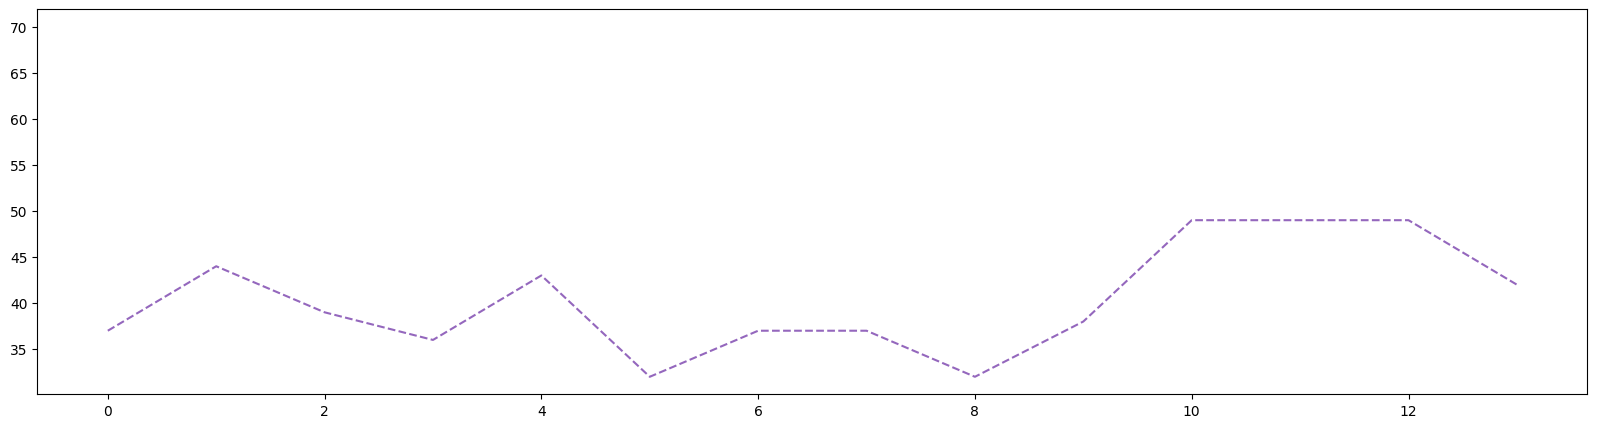

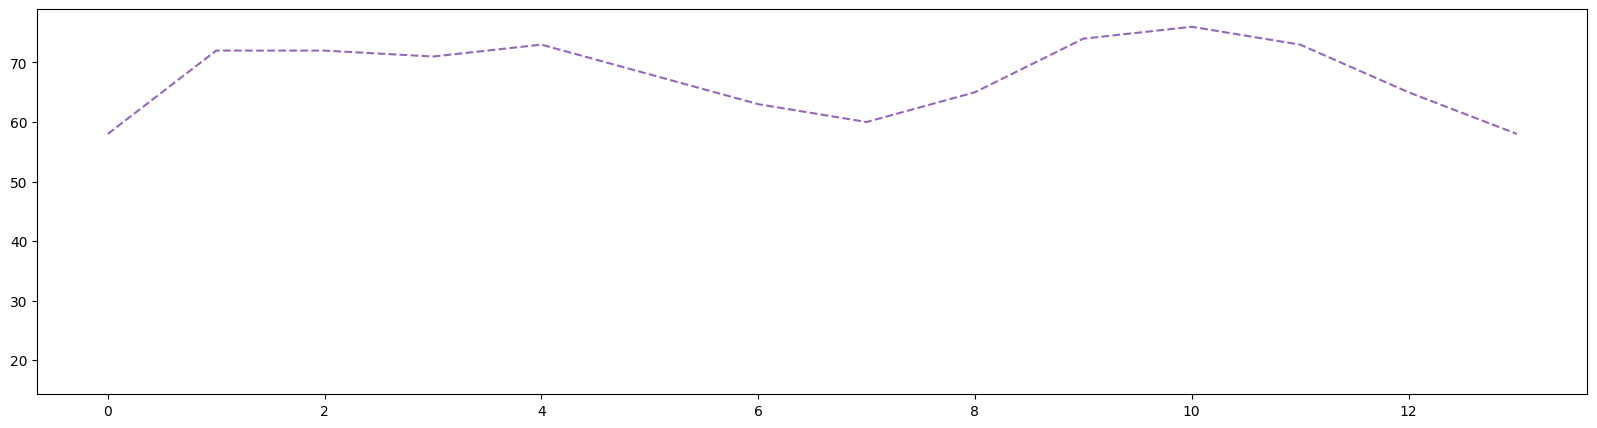

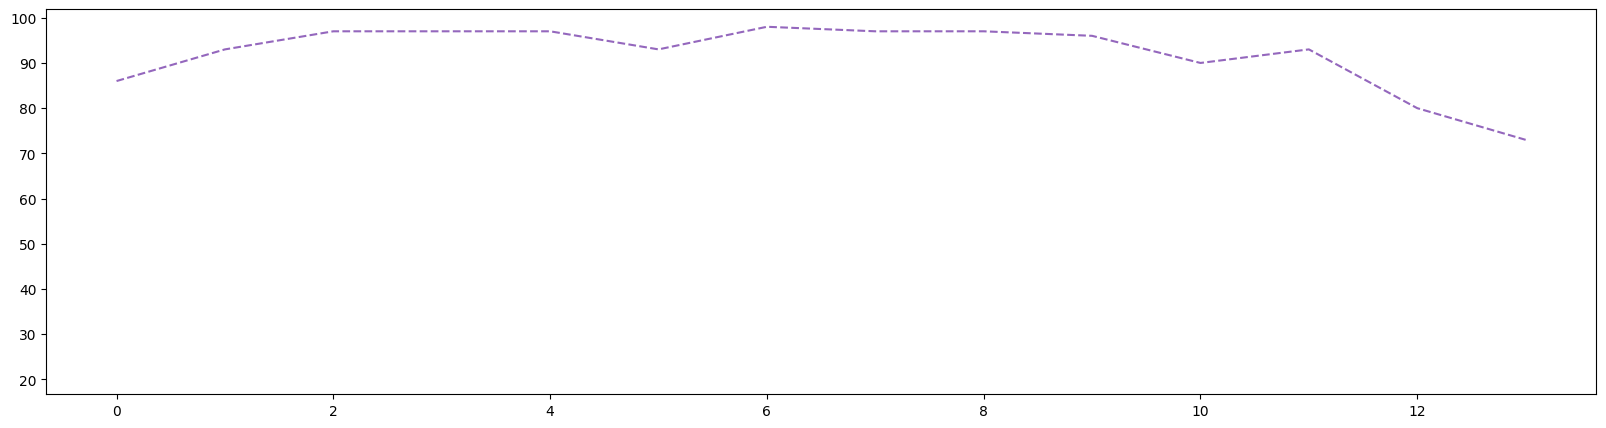

<Figure size 2000x500 with 0 Axes>

In [700]:
for n_component in range(componentsLen):
    plt.figure(figsize=(20,5))
    for tupla in bestSorted:
        plt.plot(target_train[tupla[0],n_component])
    plt.plot(targetWindow[:,n_component], "--")

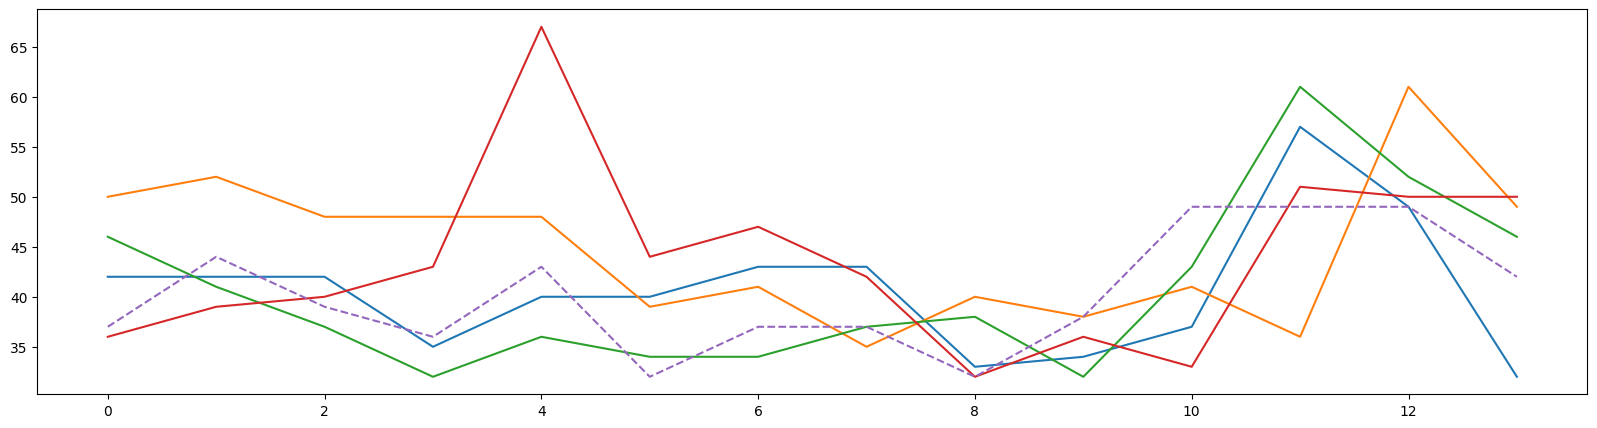

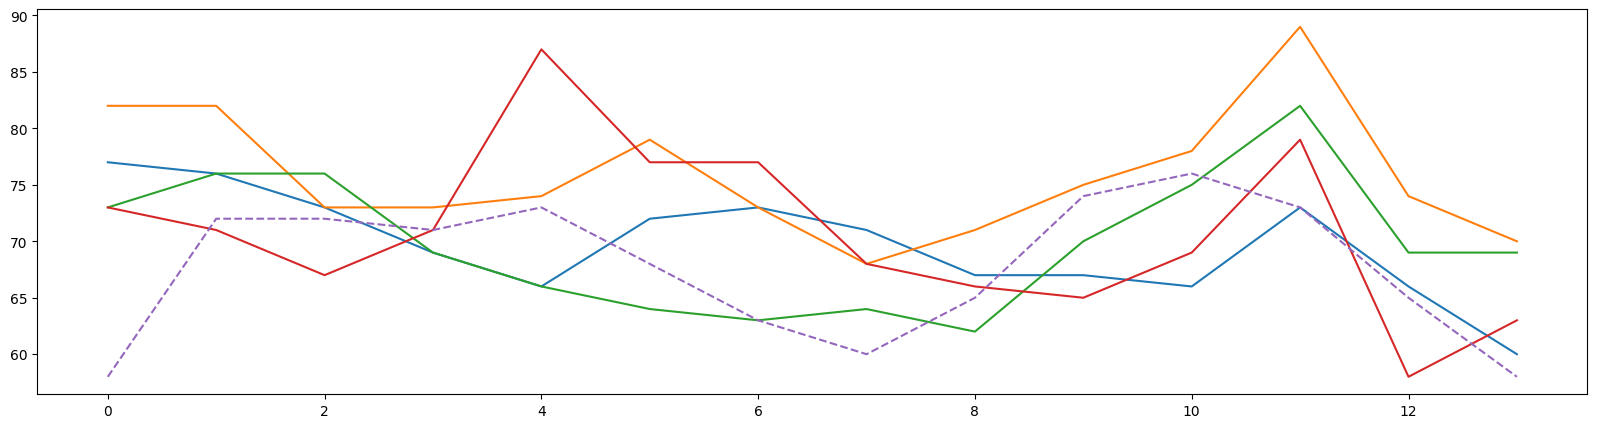

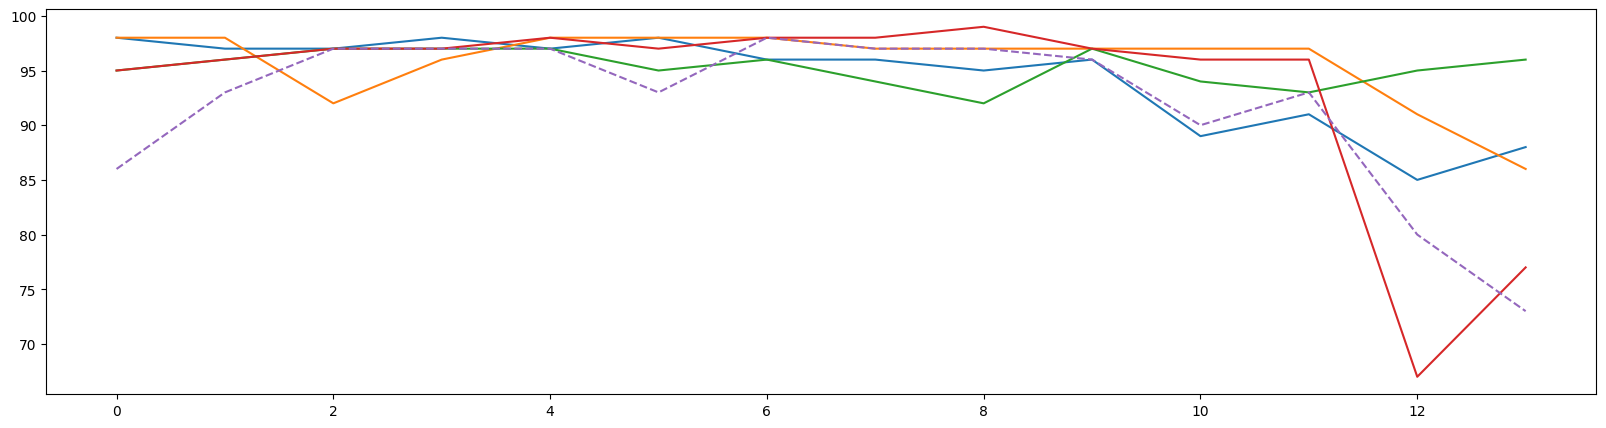

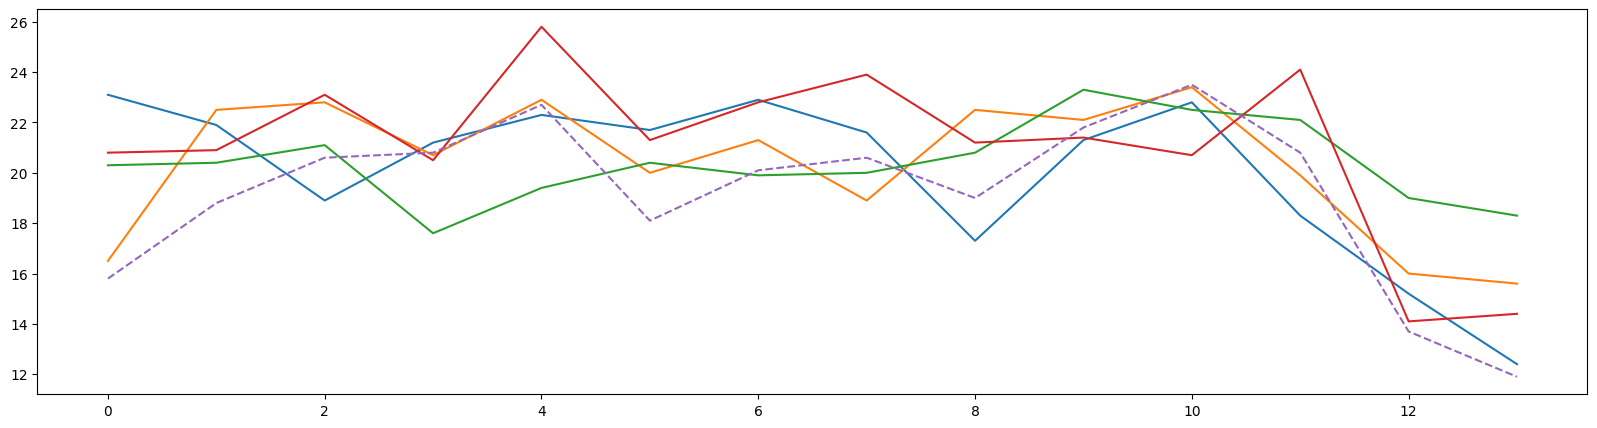

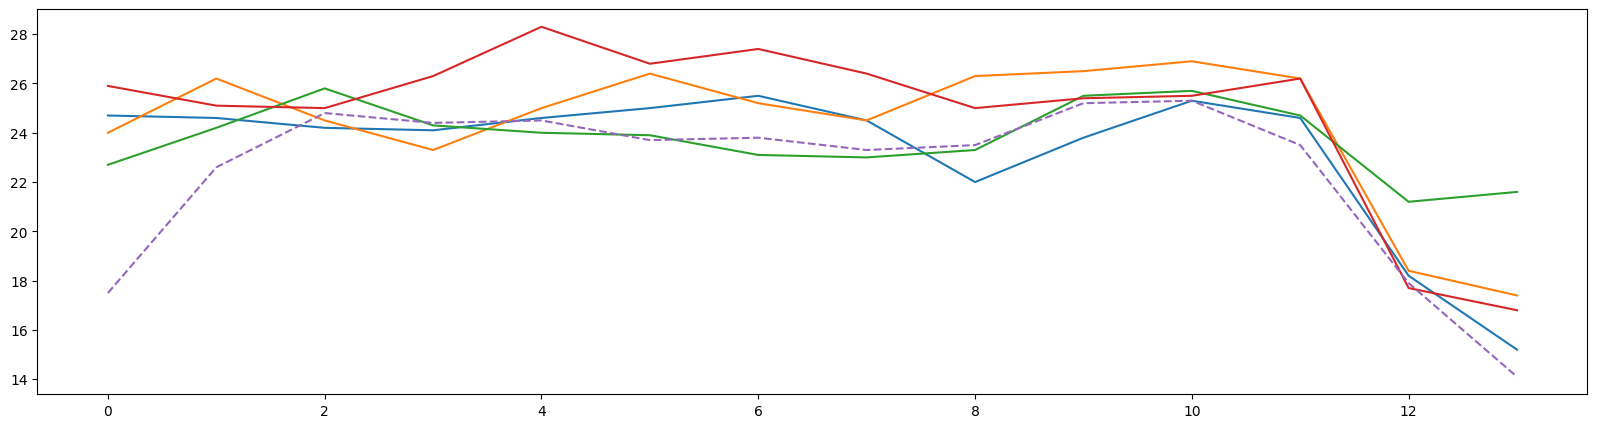

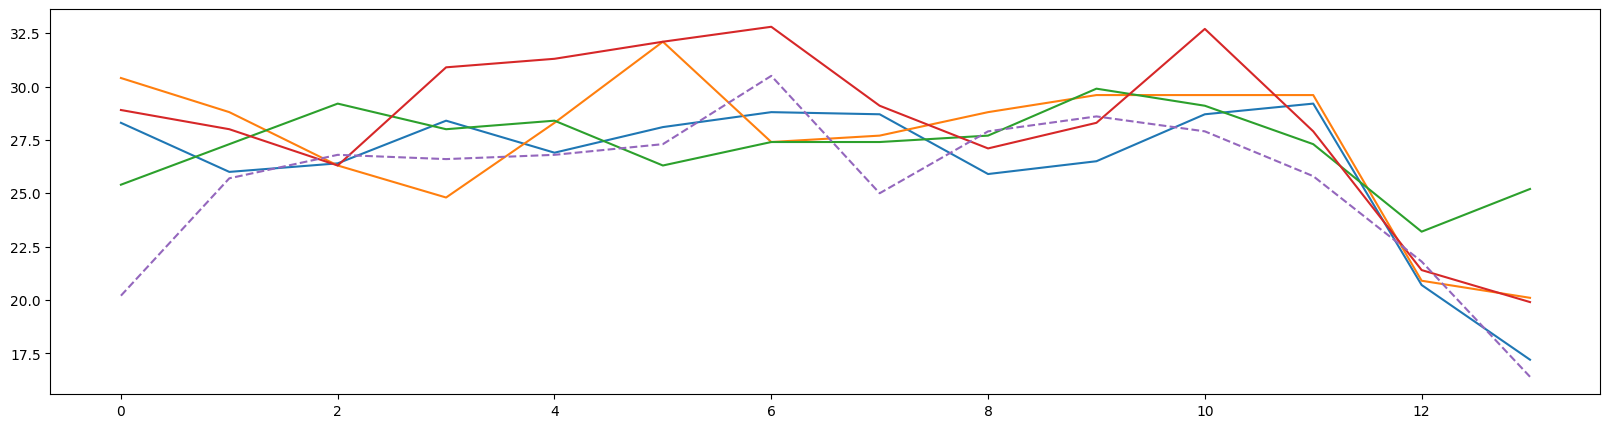

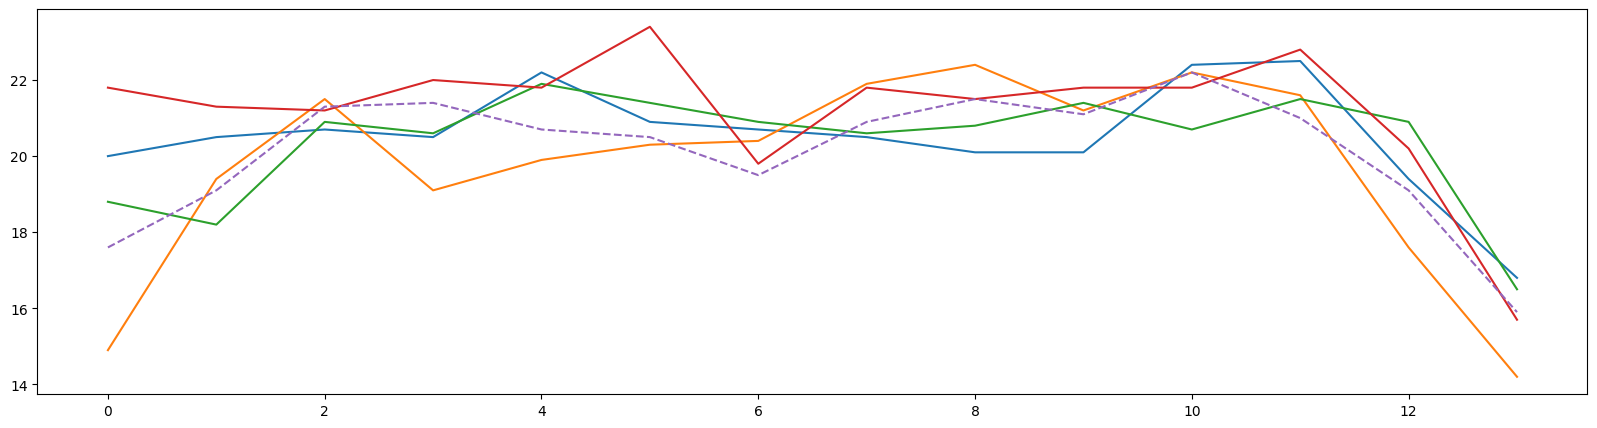

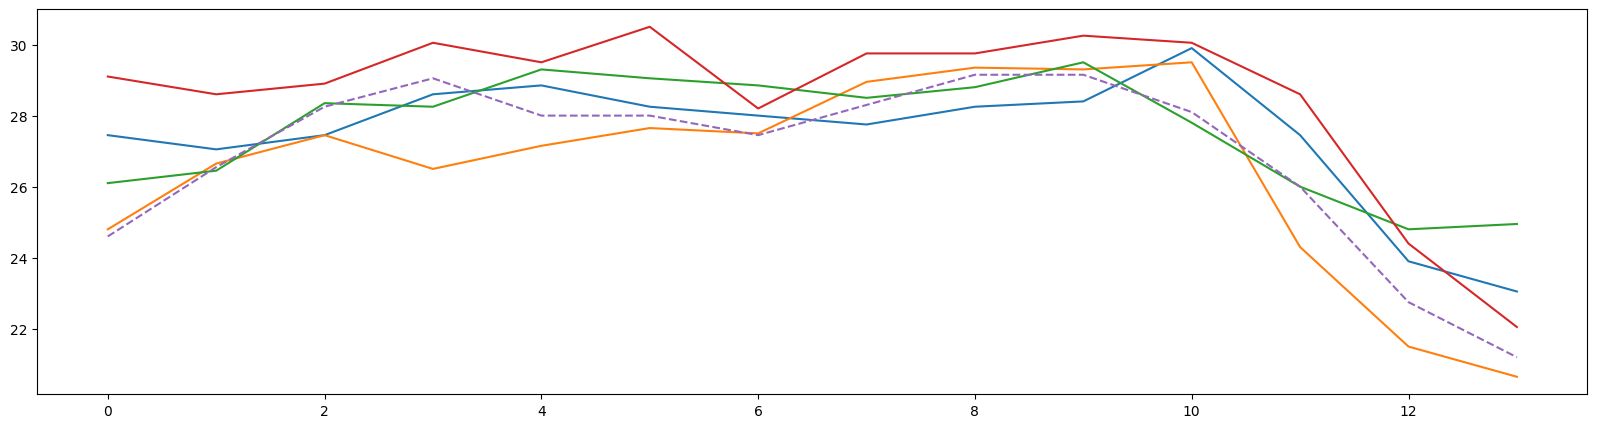

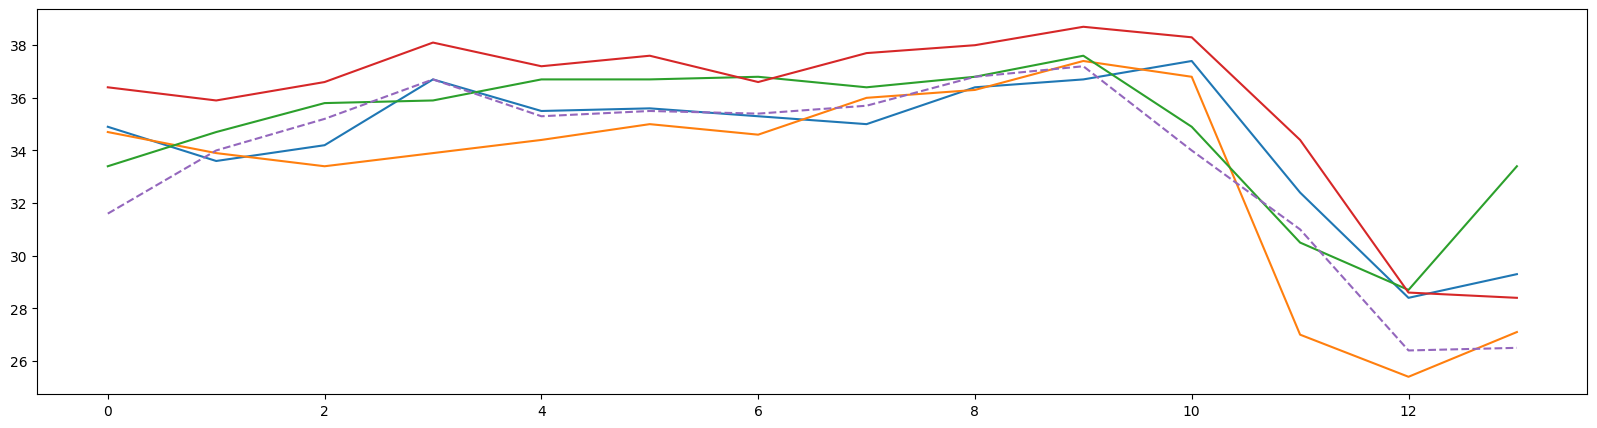

In [697]:
for n_component in range(componentsLen):
    plt.figure(figsize=(20,5))
    for tupla in bestSorted:
        plt.plot(windows[tupla[0]][:,n_component])
    plt.plot(targetWindow[:,n_component], "--")

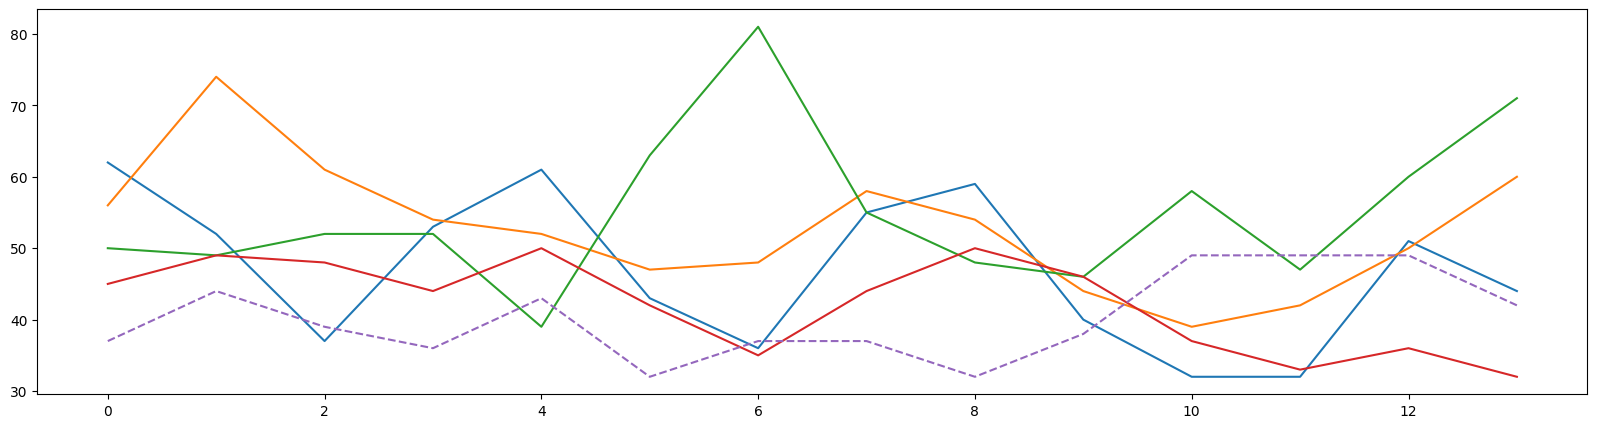

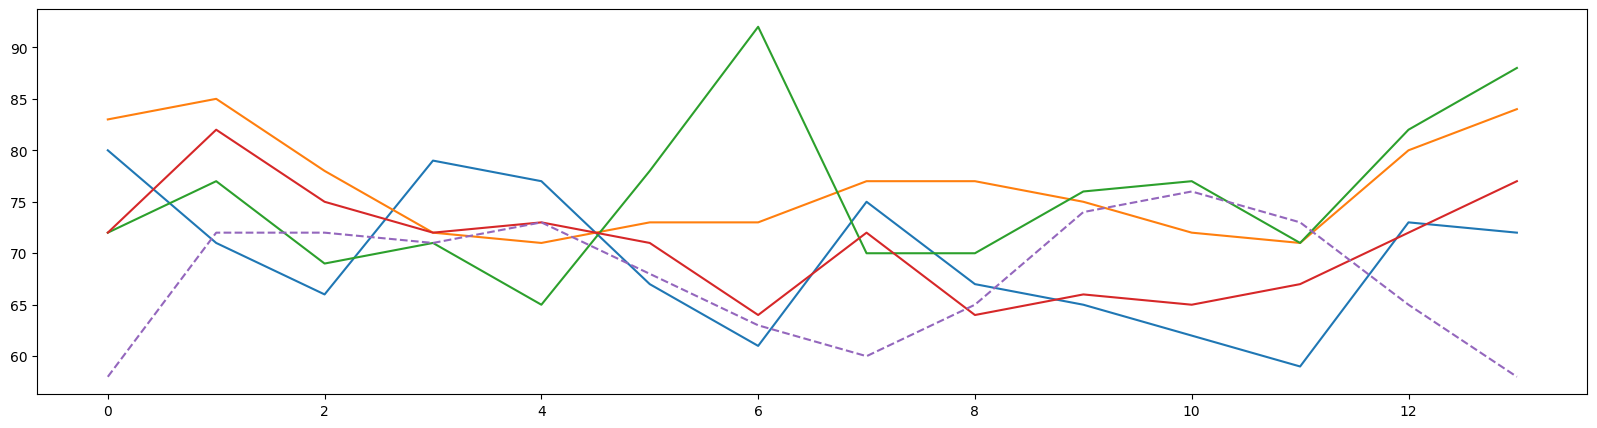

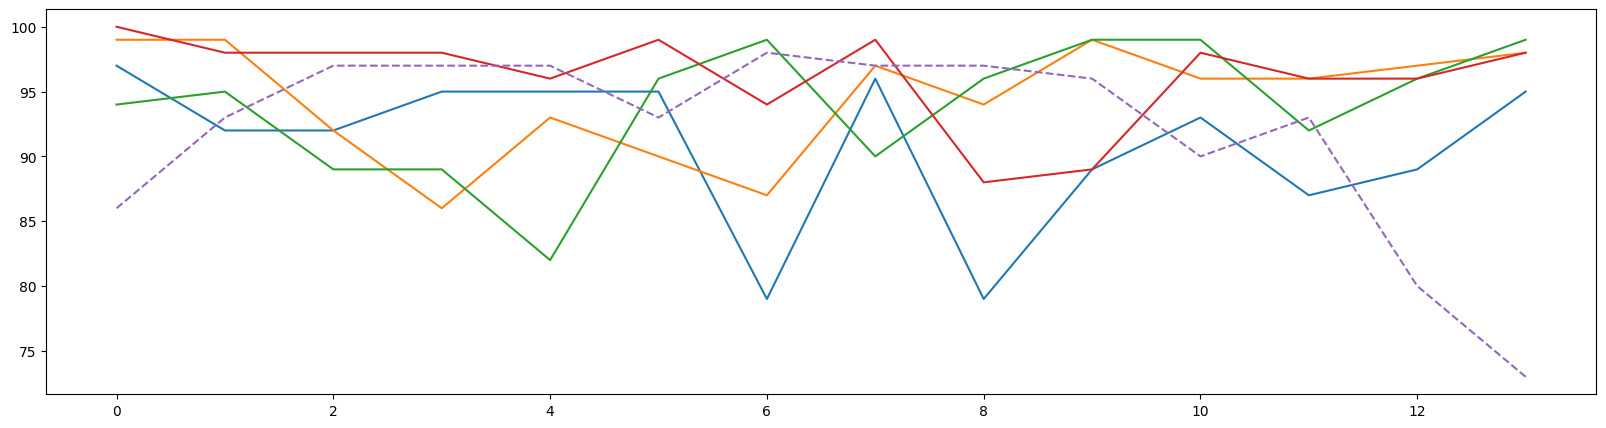

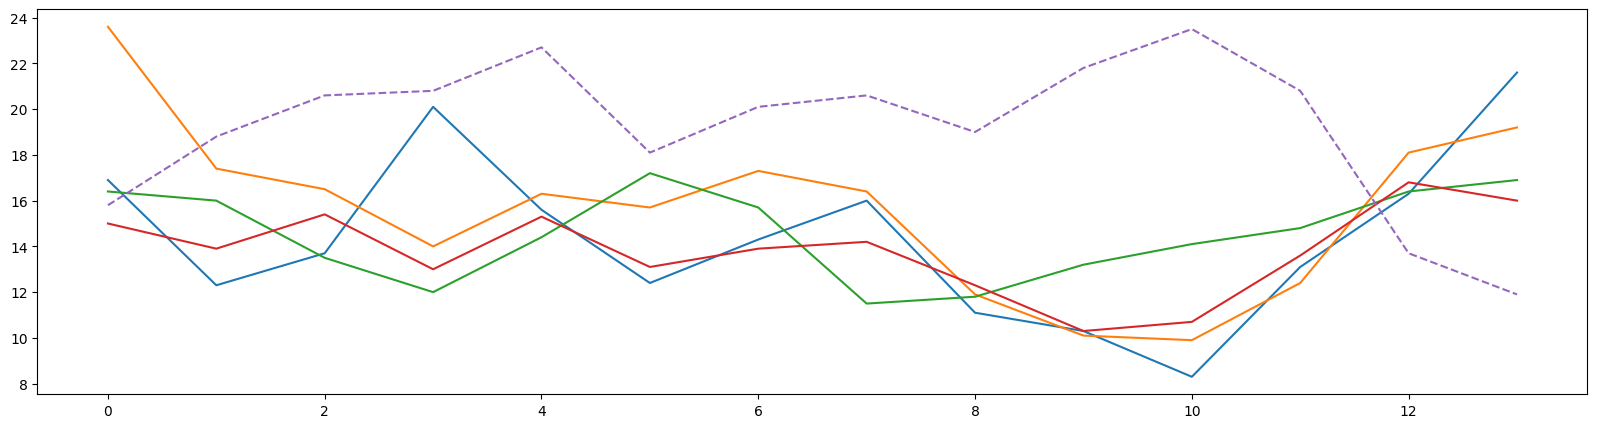

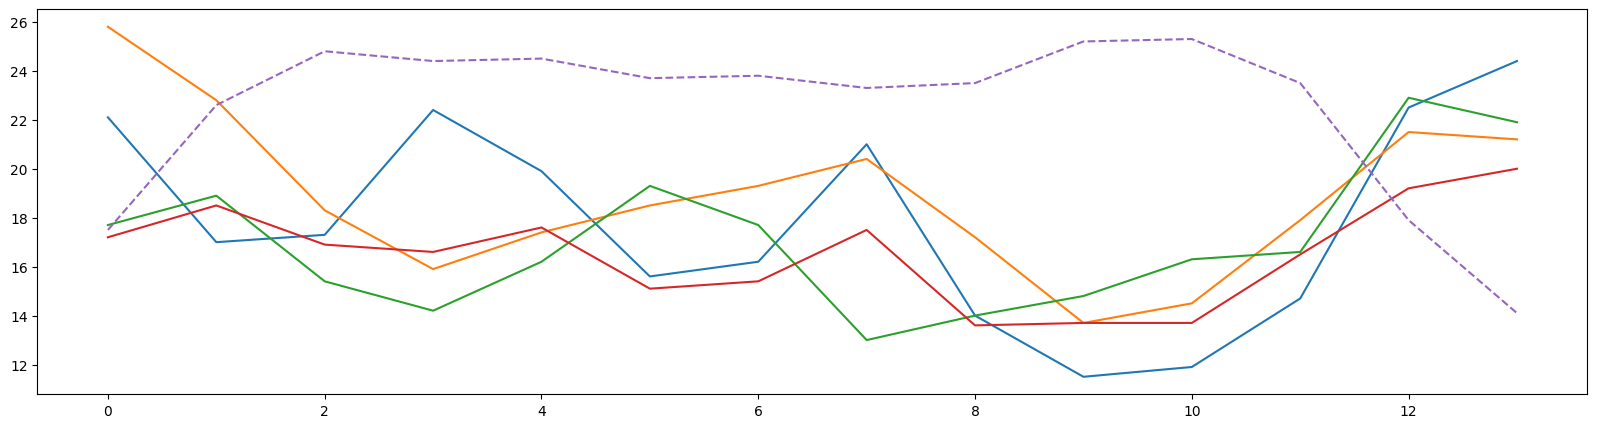

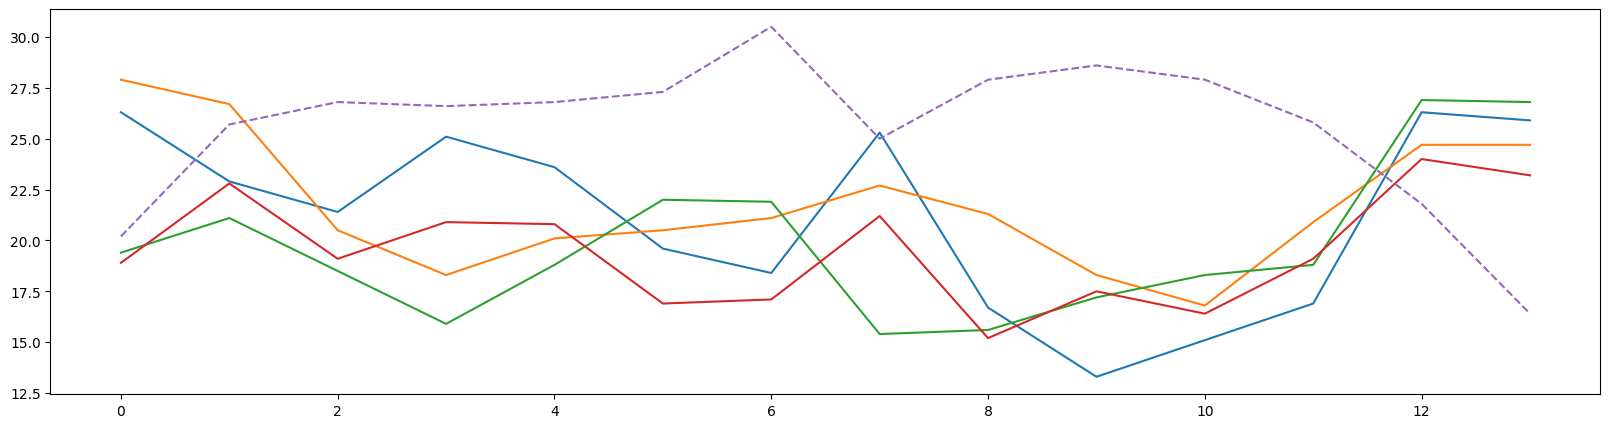

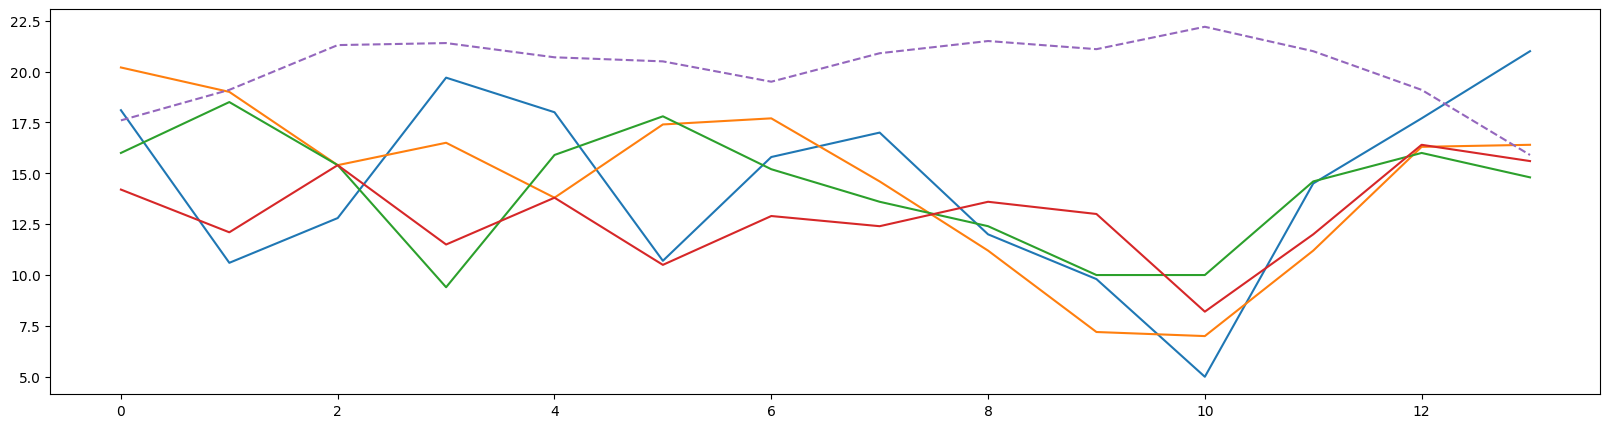

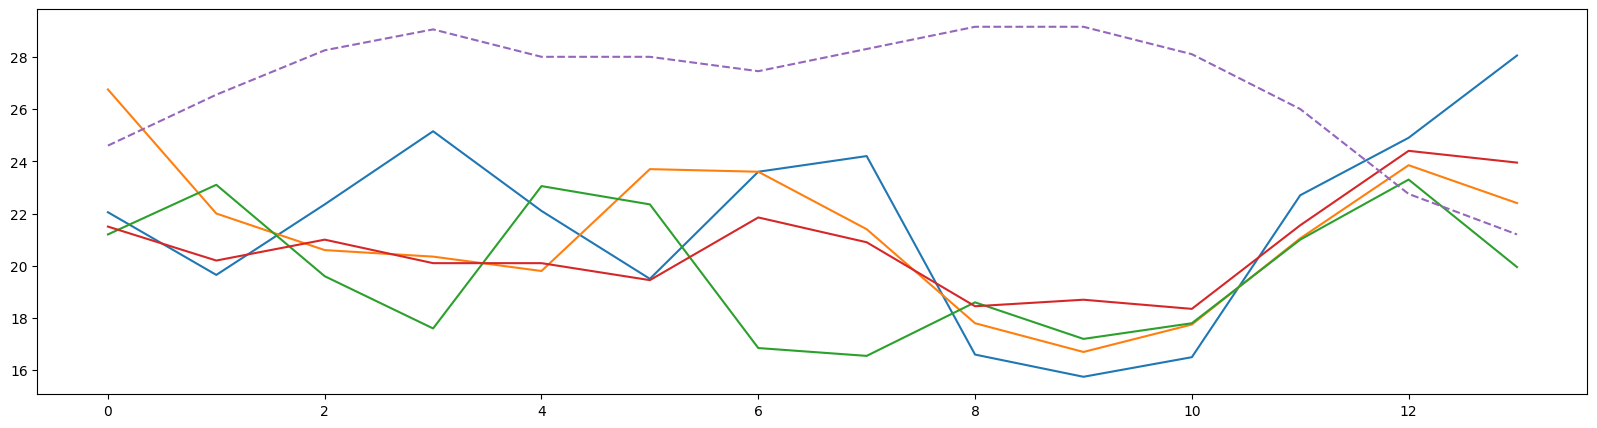

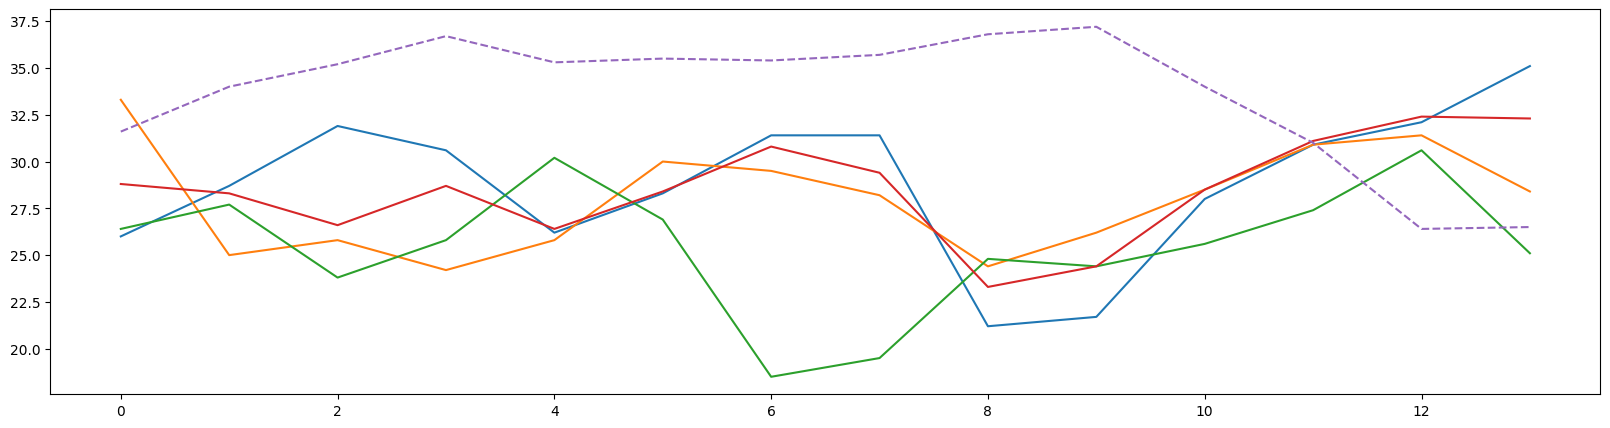

In [698]:
for n_component in range(componentsLen):
    plt.figure(figsize=(20,5))
    for tupla in worstSorted:
        plt.plot(windows[tupla[0]][:,n_component])
    plt.plot(targetWindow[:,n_component], "--")

In [110]:
maxComp, minComp, lims = [], [], []
for i in range(componentsLen):
    maxComp.append(int(max(max(a) for a in windows[:, :, i])))
    minComp.append(int(min(min(a) for a in windows[:, :, i])))
    lims.append(range(minComp[i], maxComp[i], int((maxComp[i] - minComp[i]) / 8)))

In [111]:
maxComp

[96, 107, 113, 34, 42, 57, 29, 34, 43]

In [112]:
minComp

[3, 20, 65, 6, 11, 10, 5, 15, 18]

In [113]:
lims

[range(3, 96, 11),
 range(20, 107, 10),
 range(65, 113, 6),
 range(6, 34, 3),
 range(11, 42, 3),
 range(10, 57, 5),
 range(5, 29, 3),
 range(15, 34, 2),
 range(18, 43, 3)]

In [114]:
bestMAE, worstMAE = [], []
for i in range(len(bestSorted)):
    rawBestMAE = rawWorstMAE = 0
    for f in range(componentsLen):
        rawBestMAE += (windows[bestSorted[i][0]][windowLen - 1][f] - minComp[f]) / maxComp[f]
        rawWorstMAE += (windows[worstSorted[i][0]][windowLen - 1][f] - minComp[f]) / maxComp[f]
    bestMAE.append(rawBestMAE / componentsLen)
    worstMAE.append(rawWorstMAE / componentsLen)

In [115]:
bestMAE

[0.39439941341051293,
 0.39019724106539655,
 0.3886621357600538,
 0.37178586939157926]

In [116]:
worstMAE

[0.4753114628300337,
 0.44031536862908927,
 0.5325342511040115,
 0.46804999384987095]

In [117]:
d = {'index': dict(bestSorted).keys(), 'CCI': dict(bestSorted).values(), "MAE": bestMAE,
     'index.1': dict(worstSorted).keys(), 'CCI.1': dict(worstSorted).values(), "MAE.1": worstMAE}
df = pd.DataFrame(data=d)

In [118]:
df

,index,CCI,MAE,index.1,CCI.1,MAE.1
0,649,1.000000,0.394399,3925,0.413926,0.475311
1,4257,0.983355,0.390197,1184,0.421480,0.440315
2,3674,0.957836,0.388662,2903,0.426168,0.532534
3,3990,0.945431,0.371786,3457,0.427365,0.468050


best 8
worst 8
   index       CCI       MAE  index.1     CCI.1     MAE.1
0    649  1.000000  0.394399     3925  0.413926  0.475311
1   4257  0.983355  0.390197     1184  0.421480  0.440315
2   3674  0.957836  0.388662     2903  0.426168  0.532534
3   3990  0.945431  0.371786     3457  0.427365  0.468050
